In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
!pip install squarify

In [ ]:
df = pd.read_csv('Chess games stats.csv')

In [ ]:
df

,Unnamed: 0,Game ID,White Rating,Black Rating,Opening ECO,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders
0,0,J7Xvjkte,1441,1559,C20,4,32,2,2,0,87,2,4,1
1,1,SSzpi7W1,1258,1567,C46,6,43,0,0,1,6,0,0,0
2,2,NHpcYm3r,1697,1712,C68,7,11,1,0,0,42,1,0,2
3,3,Nrzmgzmn,1978,1868,D31,5,21,3,0,0,53,6,0,1
4,4,xMuFsnC6,2073,1816,A01,2,35,3,2,0,50,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,18632,uOHTBAzi,884,1415,B00,2,56,5,1,2,94,4,4,3
18633,18633,Prg9C0BE,1187,845,B20,3,38,5,0,1,12,2,0,0
18634,18634,516BT5yk,1450,789,B21,3,64,9,4,4,36,7,2,2
18635,18635,GvumTWls,1959,1684,C15,7,14,1,0,0,34,6,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18637 entries, 0 to 18636
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      18637 non-null  int64 
 1   Game ID                         18637 non-null  object
 2   White Rating                    18637 non-null  int64 
 3   Black Rating                    18637 non-null  int64 
 4   Opening ECO                     18637 non-null  object
 5   Opening Ply                     18637 non-null  int64 
 6   White Centi-pawn Loss           18637 non-null  int64 
 7   White's Number of Inaccuracies  18637 non-null  int64 
 8   White's Number of Mistakes      18637 non-null  int64 
 9   White's Number of Blunders      18637 non-null  int64 
 10  Black Centi-pawn Loss           18637 non-null  int64 
 11  Black's Number of Inaccuracies  18637 non-null  int64 
 12  Black's Number of Mistakes      18637 non-null

In [ ]:
df_cleaned = df.drop(columns=['Game ID'])

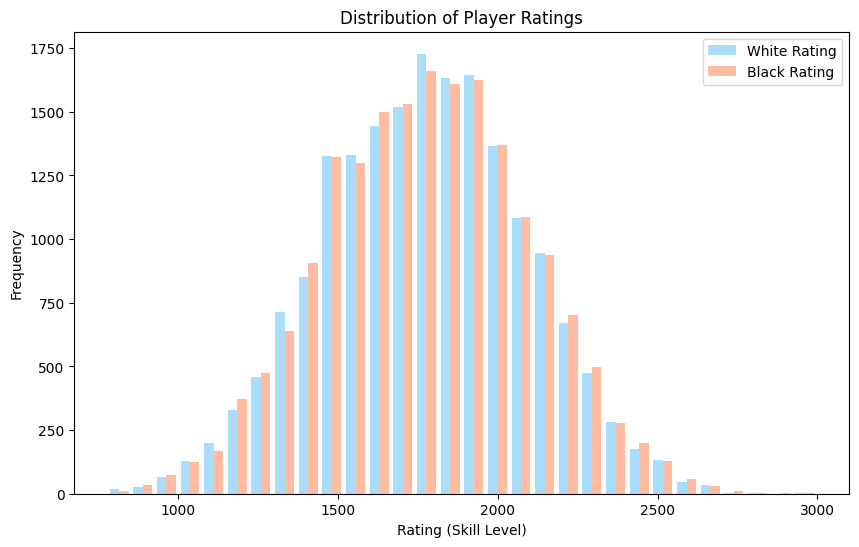

In [ ]:
# 1. Player Rating Distribution (Histogram with softer colors)
# Updated histogram with new colors and modified y-axis label
plt.figure(figsize=(10, 6))
plt.hist([df_cleaned['White Rating'], df_cleaned['Black Rating']], bins=30,
         label=['White Rating', 'Black Rating'], color=['#87cefa', '#ffa07a'], alpha=0.7)  # Light blue and light salmon colors
plt.xlabel('Rating (Skill Level)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ratings')
plt.legend()
plt.show()

In the first graph, Player Rating Distribution, we aim to show the overall skill level distribution of players who played as White and Black in the dataset. This histogram helps us understand the following:

Skill Level Range: By showing ratings on the x-axis, we can see the range of skill levels present in the dataset, from beginner to advanced.
Frequency of Ratings: The y-axis represents the frequency of players within each rating range, allowing us to see how many players fall into specific rating brackets.
Comparison Between White and Black Players: By displaying both White and Black player ratings side by side, we can observe any differences or similarities in skill levels between players who choose or are assigned each color.
Overall, this graph provides a broad overview of player skill levels and any potential patterns in player ratings based on color choice, which can be insightful for understanding the skill distribution in competitive online chess games.

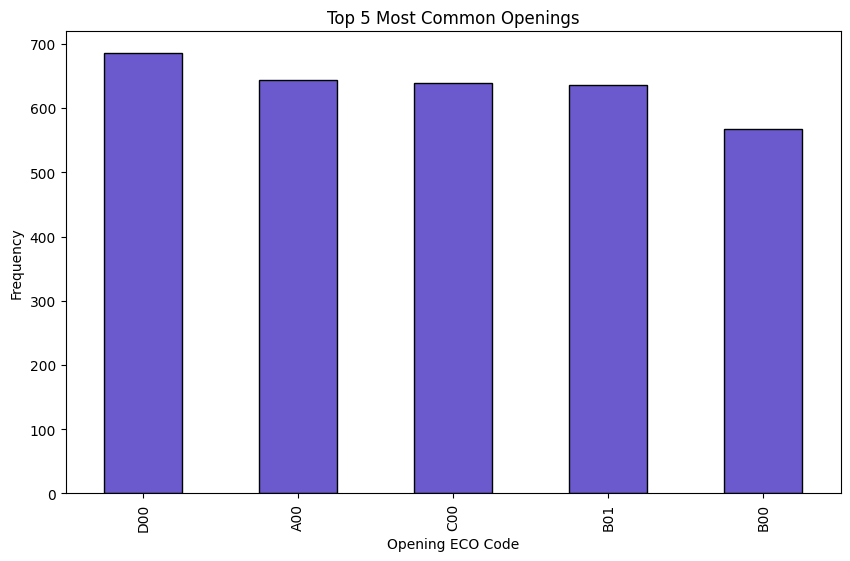

In [ ]:
# 2. Opening Frequency and Success Rate (Bar Chart)
opening_counts = df_cleaned['Opening ECO'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
opening_counts.plot(kind='bar', color='slateblue', edgecolor='black')
plt.xlabel('Opening ECO Code')
plt.ylabel('Frequency')
plt.title('Top 5 Most Common Openings')
plt.show()


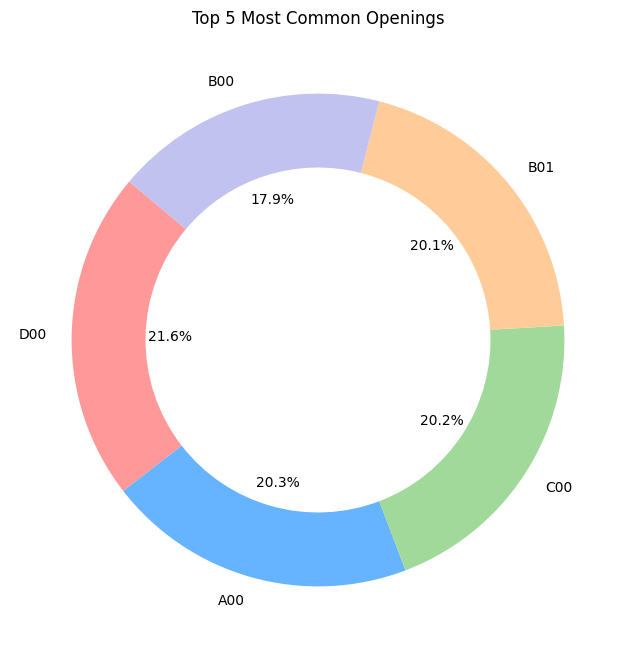

In [ ]:
# Define custom colors for each section of the donut chart
custom_colors = ['#ff9999', '#66b3ff', '#a1d99b', '#ffcc99', '#c2c2f0']

# Donut chart
plt.figure(figsize=(8, 8))
plt.pie(opening_counts, labels=opening_counts.index, autopct='%1.1f%%', startangle=140,
        colors=custom_colors, wedgeprops=dict(width=0.3))  # Set custom colors and donut width
plt.title('Top 5 Most Common Openings')
plt.gca().set_aspect("equal")  # Ensures the pie is drawn as a circle
plt.show()


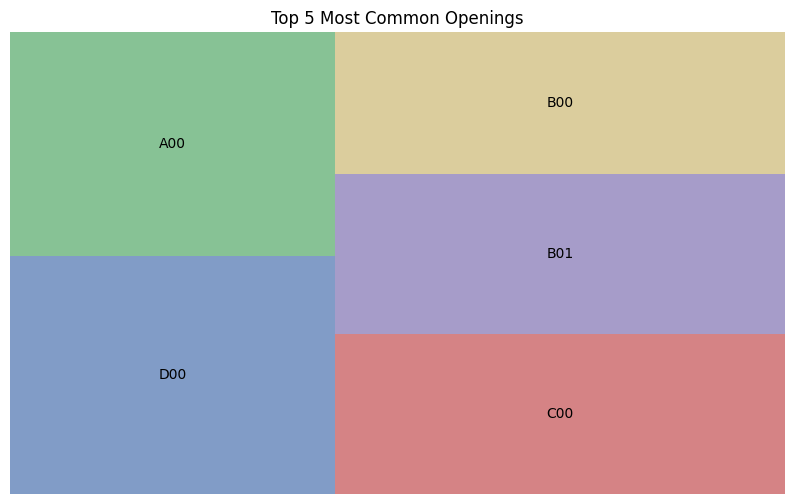

In [ ]:
import squarify  # Install with `pip install squarify` if not available

plt.figure(figsize=(10, 6))
squarify.plot(sizes=opening_counts, label=opening_counts.index, color=['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974'], alpha=0.7)
plt.axis('off')
plt.title('Top 5 Most Common Openings')
plt.show()


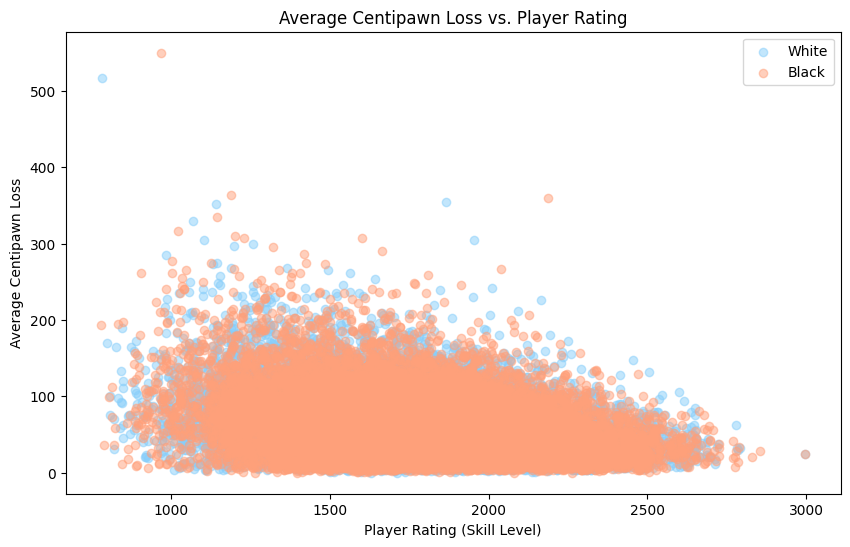

In [ ]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for White Rating vs. White Centipawn Loss
plt.scatter(df_cleaned['White Rating'], df_cleaned['White Centi-pawn Loss'],
            alpha=0.5, color='#87cefa', label='White')  # Light blue for White player data

# Scatter plot for Black Rating vs. Black Centipawn Loss
plt.scatter(df_cleaned['Black Rating'], df_cleaned['Black Centi-pawn Loss'],
            alpha=0.5, color='#ffa07a', label='Black')  # Light salmon for Black player data

# Adding labels and title
plt.xlabel('Player Rating (Skill Level)')
plt.ylabel('Average Centipawn Loss')
plt.title('Average Centipawn Loss vs. Player Rating')
plt.legend()

plt.show()

<ipython-input-115-1990e8bf763c>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  white_centipawn_avg = df_cleaned.groupby('White Rating Band')['White Centi-pawn Loss'].mean()
<ipython-input-115-1990e8bf763c>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  black_centipawn_avg = df_cleaned.groupby('Black Rating Band')['Black Centi-pawn Loss'].mean()


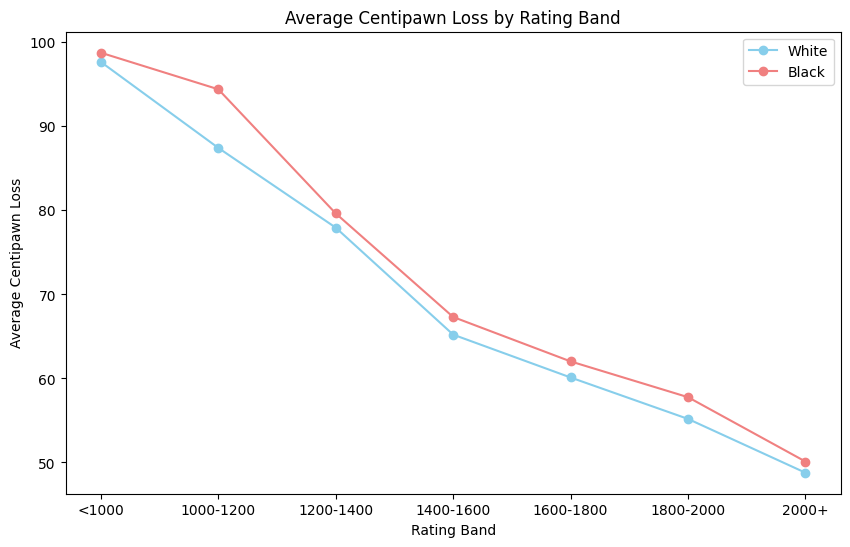

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that the rating bands are correctly defined
rating_bins = [0, 1000, 1200, 1400, 1600, 1800, 2000, 2200]
labels = ['<1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000', '2000+']

# Create new columns for White and Black Rating Bands
df_cleaned['White Rating Band'] = pd.cut(df_cleaned['White Rating'], bins=rating_bins, labels=labels)
df_cleaned['Black Rating Band'] = pd.cut(df_cleaned['Black Rating'], bins=rating_bins, labels=labels)

# Calculate the mean centipawn loss for each rating band (for both White and Black)
white_centipawn_avg = df_cleaned.groupby('White Rating Band')['White Centi-pawn Loss'].mean()
black_centipawn_avg = df_cleaned.groupby('Black Rating Band')['Black Centi-pawn Loss'].mean()

# Plotting the average centipawn loss per rating band
plt.figure(figsize=(10, 6))

# Plotting for White
plt.plot(white_centipawn_avg.index, white_centipawn_avg, marker='o', label='White', color='skyblue')

# Plotting for Black
plt.plot(black_centipawn_avg.index, black_centipawn_avg, marker='o', label='Black', color='lightcoral')

# Labels and title
plt.xlabel('Rating Band')
plt.ylabel('Average Centipawn Loss')
plt.title('Average Centipawn Loss by Rating Band')
plt.legend()
plt.show()


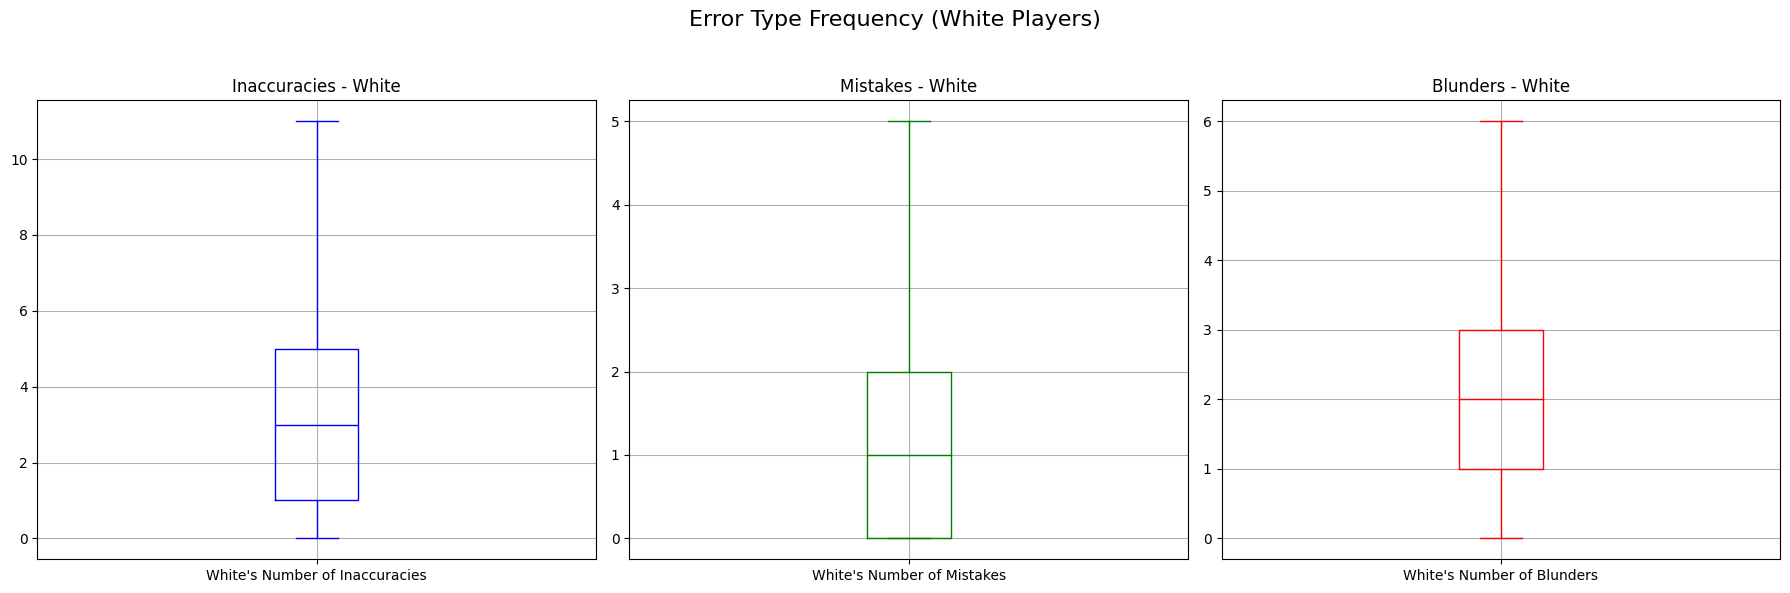

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Remove outliers for White players
df_cleaned_white_inaccuracies = remove_outliers(df_cleaned, "White's Number of Inaccuracies")
df_cleaned_white_mistakes = remove_outliers(df_cleaned, "White's Number of Mistakes")
df_cleaned_white_blunders = remove_outliers(df_cleaned, "White's Number of Blunders")

# Remove outliers for Black players
df_cleaned_black_inaccuracies = remove_outliers(df_cleaned, "Black's Number of Inaccuracies")
df_cleaned_black_mistakes = remove_outliers(df_cleaned, "Black's Number of Mistakes")
df_cleaned_black_blunders = remove_outliers(df_cleaned, "Black's Number of Blunders")

# 1. Box Plot for White Players' Error Types
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Inaccuracies for White players
df_cleaned_white_inaccuracies.boxplot(column="White's Number of Inaccuracies", ax=axes[0],
                                      color=dict(boxes='blue', whiskers='blue', medians='blue', caps='blue'))
axes[0].set_title("Inaccuracies - White")

# Mistakes for White players
df_cleaned_white_mistakes.boxplot(column="White's Number of Mistakes", ax=axes[1],
                                  color=dict(boxes='green', whiskers='green', medians='green', caps='green'))
axes[1].set_title("Mistakes - White")

# Blunders for White players
df_cleaned_white_blunders.boxplot(column="White's Number of Blunders", ax=axes[2],
                                  color=dict(boxes='red', whiskers='red', medians='red', caps='red'))
axes[2].set_title("Blunders - White")

plt.suptitle("Error Type Frequency (White Players)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


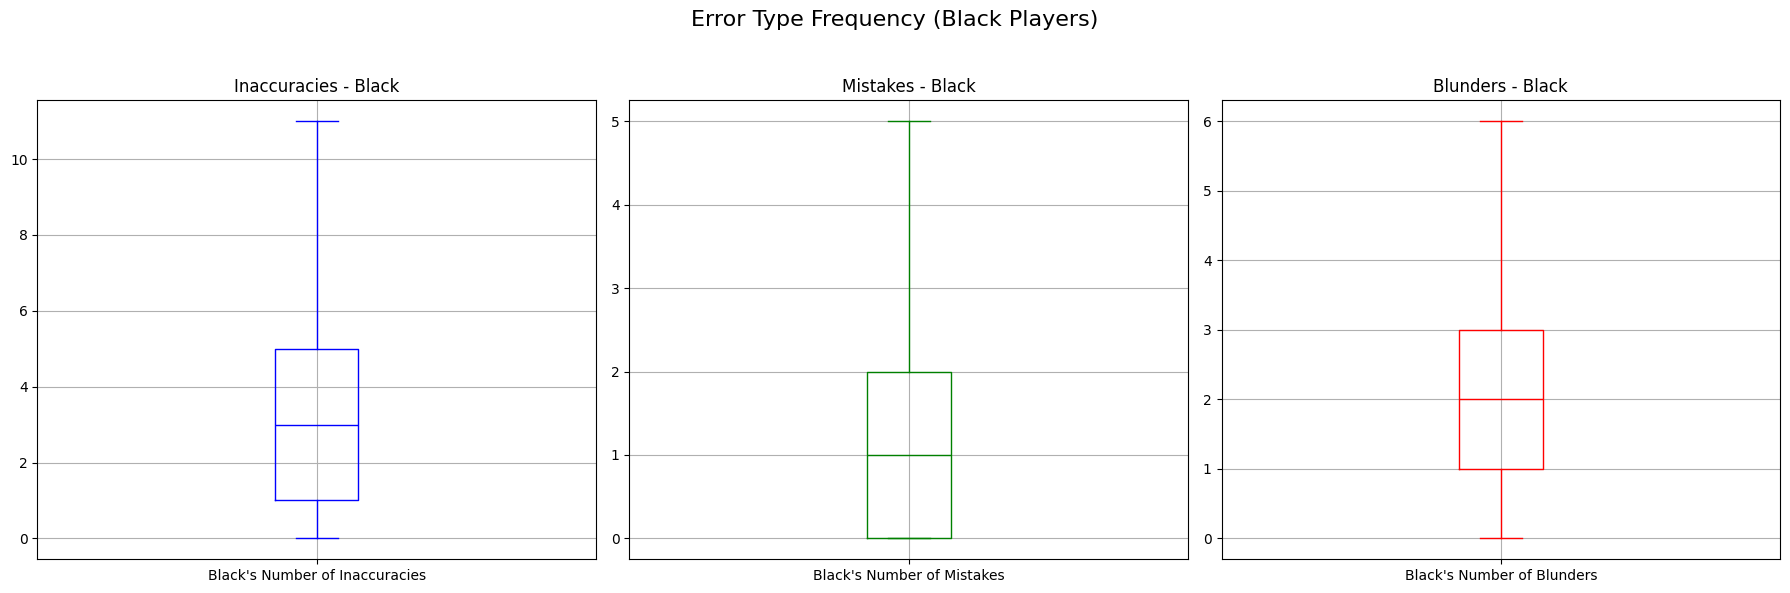

In [ ]:
 #2. Box Plot for Black Players' Error Types
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Inaccuracies for Black players
df_cleaned_black_inaccuracies.boxplot(column="Black's Number of Inaccuracies", ax=axes[0],
                                      color=dict(boxes='blue', whiskers='blue', medians='blue', caps='blue'))
axes[0].set_title("Inaccuracies - Black")

# Mistakes for Black players
df_cleaned_black_mistakes.boxplot(column="Black's Number of Mistakes", ax=axes[1],
                                  color=dict(boxes='green', whiskers='green', medians='green', caps='green'))
axes[1].set_title("Mistakes - Black")

# Blunders for Black players
df_cleaned_black_blunders.boxplot(column="Black's Number of Blunders", ax=axes[2],
                                  color=dict(boxes='red', whiskers='red', medians='red', caps='red'))
axes[2].set_title("Blunders - Black")

plt.suptitle("Error Type Frequency (Black Players)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

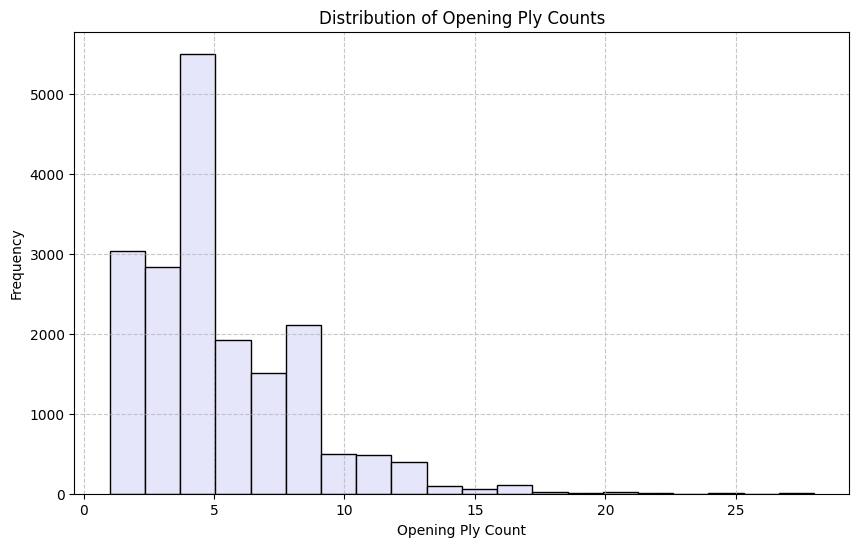

In [ ]:
# 5. Opening Ply Distribution (Histogram)


# Plotting the histogram
plt.figure(figsize=(10, 6))

# Histogram with 20 bins, teal color with black edges
plt.hist(df_cleaned['Opening Ply'], bins=20, color='lavender', edgecolor='black')

# Adding labels and title
plt.xlabel('Opening Ply Count')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Ply Counts')

# Optional: Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


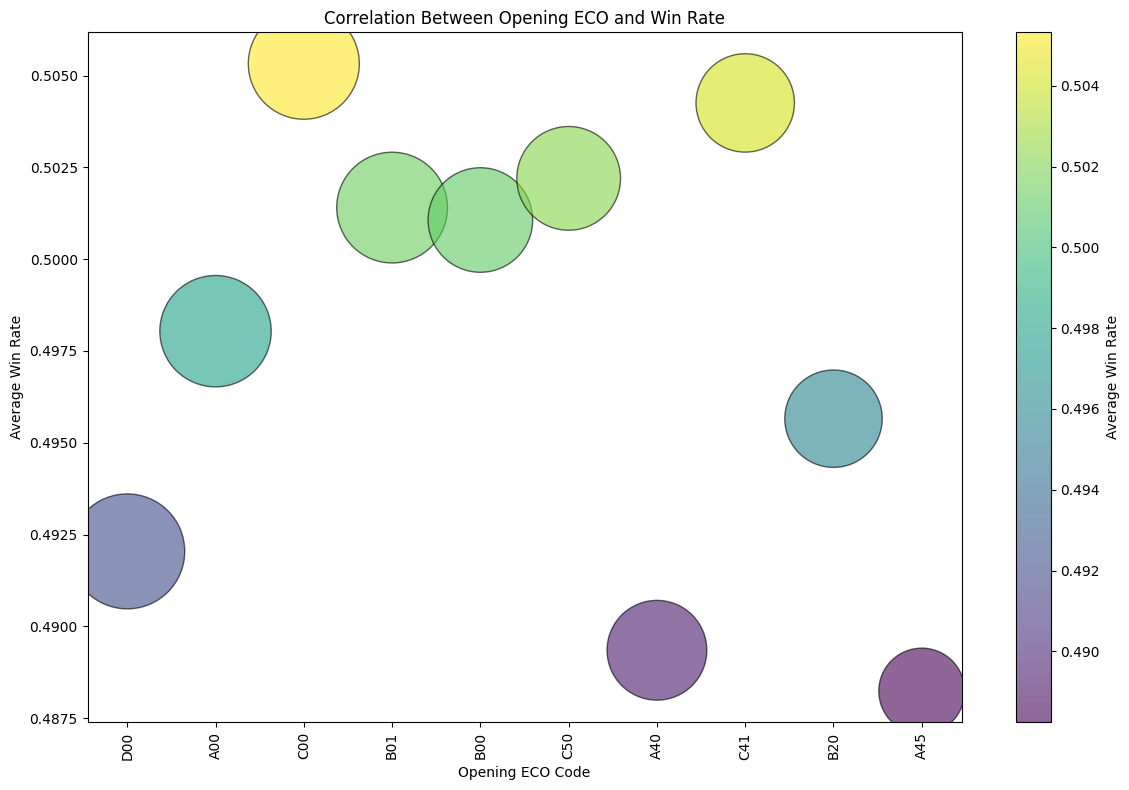

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a 'Win Rate' column with random values between 0.3 and 0.7 for demonstration
np.random.seed(0)  # For consistent results
df_cleaned['Win Rate'] = np.random.uniform(0.3, 0.7, len(df_cleaned))

# Creating the top_openings DataFrame
top_openings = df_cleaned.groupby('Opening ECO').agg(
    frequency=('Opening ECO', 'count'),
    avg_win_rate=('Win Rate', 'mean')
).nlargest(10, 'frequency')  # Select top 10 most common openings

# Plotting the bubble chart
plt.figure(figsize=(12, 8))

# Bubble plot: x-axis = Opening ECO, y-axis = Average Win Rate, size = frequency of each opening
plt.scatter(
    top_openings.index,
    top_openings['avg_win_rate'],
    s=top_openings['frequency'] * 10,  # Size of bubbles based on frequency
    c=top_openings['avg_win_rate'],  # Color based on average win rate
    cmap='viridis',  # Colormap
    alpha=0.6,  # Transparency for better visuals
    edgecolor='black'  # Outline the bubbles
)

# Adding labels and title
plt.xlabel('Opening ECO Code')
plt.ylabel('Average Win Rate')
plt.title('Correlation Between Opening ECO and Win Rate')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.colorbar(label='Average Win Rate')  # Color bar to indicate win rate

# Show the plot
plt.tight_layout()
plt.show()



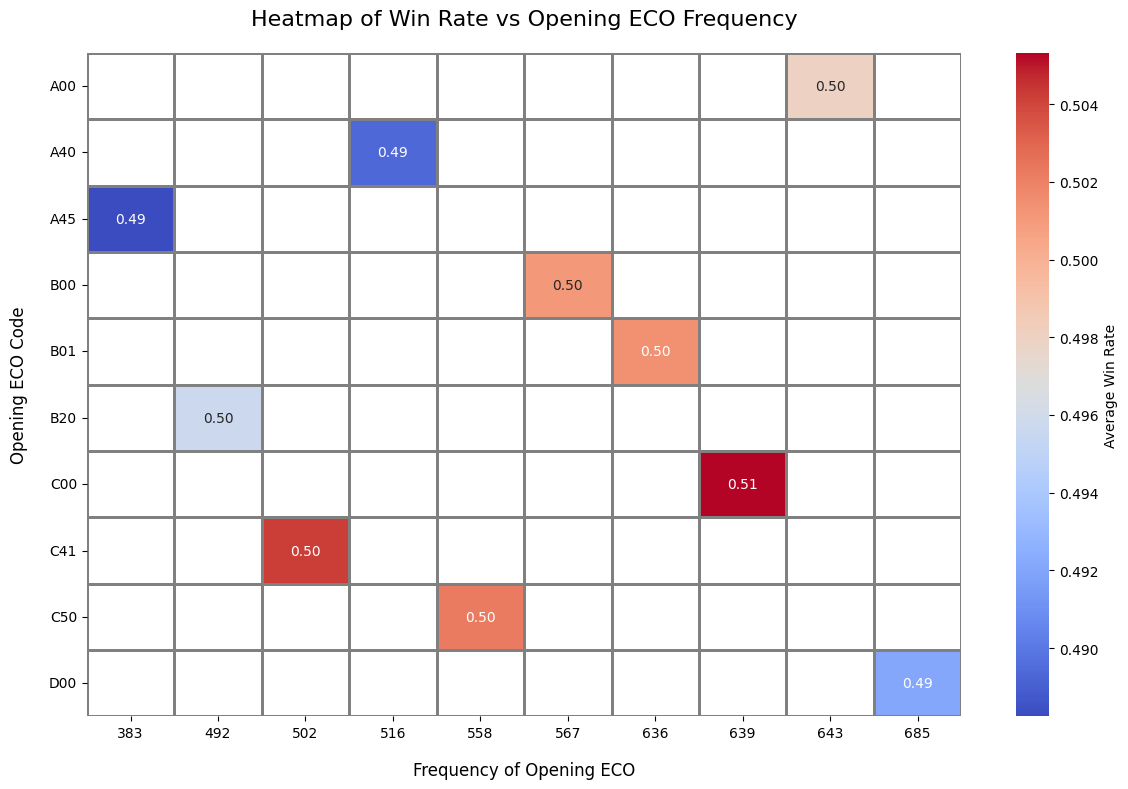

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called top_openings that is already prepared for plotting
# Creating a pivot table for the heatmap based on your data

# Plotting the heatmap with adjusted y-axis labels
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    heatmap_data,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    cbar_kws={'label': 'Average Win Rate'},
    linewidths=1,
    linecolor='grey',
    annot_kws={"size": 10},
    mask=heatmap_data.isnull()
)

# Adding title and labels
plt.title('Heatmap of Win Rate vs Opening ECO Frequency', fontsize=16, pad=20)
plt.xlabel('Frequency of Opening ECO', fontsize=12, labelpad=15)
plt.ylabel('Opening ECO Code', fontsize=12, labelpad=15)

# Setting y-axis labels rotation to 0 for horizontal alignment
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

